In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path = 'New Text Document.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])


data = 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
**************************************
data.describe = 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
**************************************


<AxesSubplot:xlabel='Population', ylabel='Profit'>

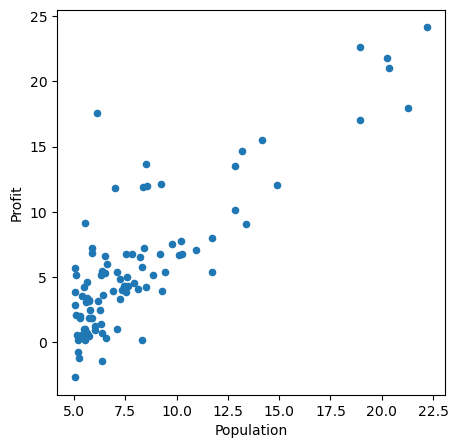

In [3]:
print('data = \n' ,data.head(10) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))


In [4]:
# adding a new column called ones before the data
data.insert(0,'Ones',1)
print('new data = \n' ,data.head(10) )

new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


In [5]:
cols = data.shape[1]
X =data.iloc[: , 0:cols-1]
y =data.iloc[: , cols-1:cols]

In [6]:
X,y

(    Ones  Population
 0      1      6.1101
 1      1      5.5277
 2      1      8.5186
 3      1      7.0032
 4      1      5.8598
 ..   ...         ...
 92     1      5.8707
 93     1      5.3054
 94     1      8.2934
 95     1     13.3940
 96     1      5.4369
 
 [97 rows x 2 columns],
       Profit
 0   17.59200
 1    9.13020
 2   13.66200
 3   11.85400
 4    6.82330
 ..       ...
 92   7.20290
 93   1.98690
 94   0.14454
 95   9.05510
 96   0.61705
 
 [97 rows x 1 columns])

In [7]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))


In [8]:
# cost function
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))

print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))



computeCost(X, y, theta) =  32.072733877455676


In [9]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


In [10]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

print('g = ' , g)

print('computeCost = ' , computeCost(X, y, g))


g =  [[-3.24140214  1.1272942 ]]
computeCost =  4.515955503078914


In [11]:
# get best fit line
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

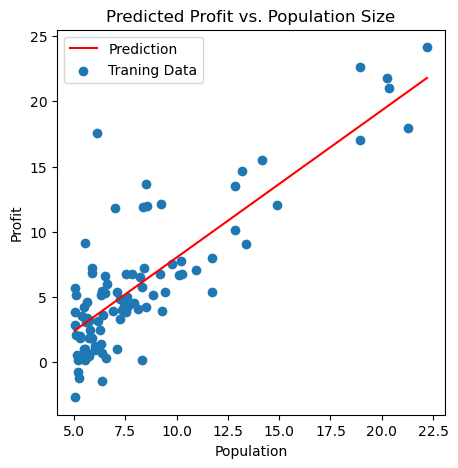

In [12]:
# draw the line

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs. Training Epoch')

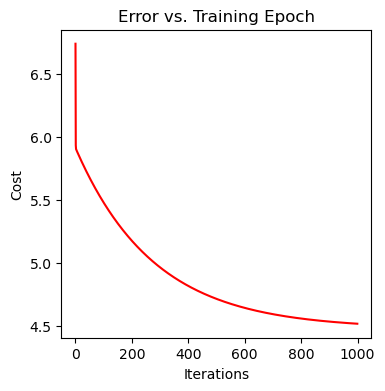

In [13]:
# draw error graph

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
